In [346]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Path accross reciprocal space

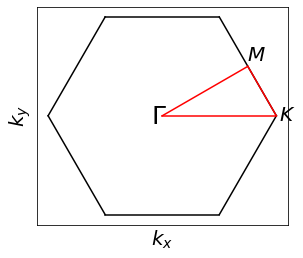

In [516]:

def f(x, y):
    return -4*(np.cos(x)+np.cos(0.5*x-np.sqrt(3)*y/2)+np.cos(0.5*x+np.sqrt(3)*y/2))+12


x = np.linspace(-5, 5, 500)
y = np.linspace(-4.5, 4.5, 400)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


#plt.contour(X, Y, Z, 20, cmap='winter',levels=18);
#plt.colorbar()
import matplotlib as mpl
Npoints_q=10
t=np.linspace(0, 1, Npoints_q)

pol=[[2*np.pi/3,4*np.pi/3,2*np.pi/3,-2*np.pi/3,-4*np.pi/3,-2*np.pi/3],[-2*np.pi/np.sqrt(3),0,2*np.pi/np.sqrt(3),2*np.pi/np.sqrt(3),0,-2*np.pi/np.sqrt(3)]]
#scatter(pol[0],pol[1])

pn=[[0,4*np.pi/3,np.pi,0],[0,0,np.pi/np.sqrt(3),0]]

for i in range(6):
    plot(pol[0][i%6]*(1-t)+t*pol[0][(i+1)%6],pol[1][i%6]*(1-t)+t*pol[1][(i+1)%6], c='k')
    
qxslist=[]
qyslist=[]   
for i in range(3):
    qxslist.append(pn[0][i%4]*(1-t)+t*pn[0][(i+1)%4])
    qyslist.append(pn[1][i%4]*(1-t)+t*pn[1][(i+1)%4])
    plot(pn[0][i%4]*(1-t)+t*pn[0][(i+1)%4],pn[1][i%4]*(1-t)+t*pn[1][(i+1)%4], c='r')


plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel(r'$k_y$', size=20)
plt.xlabel(r'$k_x$', size=20)
#plt.text(7.3,0,r'$\epsilon_F$',size=20)
plt.text(-0.42,-0.3,r'$\Gamma$',size=25)
plt.text(3.1,2,r'$M$',size=20)
plt.text(4.3,-0.20,r'$K$',size=20)
xticks([])
yticks([])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

qxs=reshape(vstack(qxslist),[1,3*Npoints_q])
qys=reshape(vstack(qyslist),[1,3*Npoints_q])
preQs=reshape(array([qxs,qys]).T,[3*Npoints_q,2])
norms=sqrt(sum(preQs*preQs,axis=1))
Qs=preQs[where(norms > 0)[0]]

def flattens(*lists):
    a = []
    for l in lists:
        a.extend(l)
    return a
    
qxslist=[]
qyslist=[]
dq=1/25.0
totpoints=0
points_ksp=[]
for i in range(3):
    disti=sqrt((pn[0][(i+1)%4]-pn[0][i%4])**2 +(pn[1][(i+1)%4]-pn[1][i%4])**2 )/dq
    t=np.linspace(0, 1, int(disti))
    points_ksp.append(totpoints)
    totpoints=totpoints+int(disti)
    qxslist.extend(list(pn[0][i%4]*(1-t)+t*pn[0][(i+1)%4]))
    qyslist.extend(list(pn[1][i%4]*(1-t)+t*pn[1][(i+1)%4]))
    

points_ksp.append(totpoints)

qxs=array(qxslist)
qys=array(qyslist)
preQs=reshape(array([qxs,qys]).T,[totpoints,2])
norms=sqrt(sum(preQs*preQs,axis=1))
Qs=preQs[where(norms > 0)[0]]


# Real space lattice

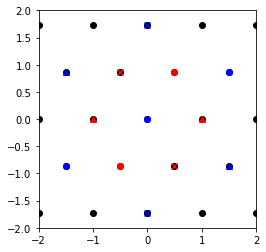

In [503]:
a=1
a_1=a*np.array([1,0,0])
a_2=a*np.array([1/2,np.sqrt(3)/2,0])
zhat=np.array([0,0,1])

Vol_real=np.dot(np.cross(a_1,a_2),zhat)
b_1=np.cross(a_2,zhat)*(2*np.pi)/Vol_real
b_2=np.cross(zhat,a_1)*(2*np.pi)/Vol_real
Vol_rec=np.dot(np.cross(b_1,b_2),zhat)
#print(np.dot(a_2,b_2),np.dot(a_1,b_1))

Np=20
n1=np.arange(-Np,Np+1)
n2=np.arange(-Np,Np+1)

a_1=a_1[0:2]
a_2=a_2[0:2]
b_1=b_1[0:2]
b_2=b_2[0:2]


### real lattice
Real_lat=[]
for i in n1:
    for j in n2:
        point=a_1*i+a_2*j
        
        
        point_x=a_1[0]*i+a_2[0]*j
        point_y=a_1[1]*i+a_2[1]*j
        
        Real_lat.append(point)
        scatter(point[0],point[1], c='k')
        #print(point[0],point[1])
        
point_x=a_1[0]*0+a_2[0]*0
point_y=a_1[1]*0+a_2[1]*0
scatter(point_x,point_y, c='b')
plt.xlim([-2,2])
plt.ylim([-2,2])



########################
tpp1=568
#tp1=1
tp1=568
nns=[]

## 0 pm 1
point_x=a_1[0]*0+a_2[0]*1
point_y=a_1[1]*0+a_2[1]*1
scatter(point_x,point_y, c='r')
nns.append([point_x,point_y])

## 0 pm 1
point_x=a_1[0]*0+a_2[0]*(-1)
point_y=a_1[1]*0+a_2[1]*(-1)
scatter(point_x,point_y, c='r')
nns.append([point_x,point_y])

##  mp 1 pm 1
point_x=a_1[0]*(1)+a_2[0]*(-1)
point_y=a_1[1]*(1)+a_2[1]*(-1)
scatter(point_x,point_y, c='r',marker='x')
nns.append([point_x,point_y])

##  mp 1 pm 1
point_x=a_1[0]*(-1)+a_2[0]*1
point_y=a_1[1]*(-1)+a_2[1]*1
scatter(point_x,point_y, c='r',marker='x')
nns.append([point_x,point_y])

## pm 1 0
point_x=a_1[0]*(1)+a_2[0]*0
point_y=a_1[1]*(1)+a_2[1]*0
scatter(point_x,point_y, c='r',marker='^')
nns.append([point_x,point_y])

## pm 1 0
point_x=a_1[0]*(-1)+a_2[0]*0
point_y=a_1[1]*(-1)+a_2[1]*0
scatter(point_x,point_y, c='r',marker='^')
nns.append([point_x,point_y])


################
tp2=-108 #/tpp1
nnns=[]

## 0 pm 1
point_x=a_1[0]*1+a_2[0]*1
point_y=a_1[1]*1+a_2[1]*1
scatter(point_x,point_y, c='b')
nnns.append([point_x,point_y])

## 0 pm 1
point_x=a_1[0]*(-1)+a_2[0]*(-1)
point_y=a_1[1]*(-1)+a_2[1]*(-1)
scatter(point_x,point_y, c='b')
nnns.append([point_x,point_y])

##  mp 1 pm 1
point_x=a_1[0]*(-1)+a_2[0]*(2)
point_y=a_1[1]*(-1)+a_2[1]*(2)
scatter(point_x,point_y, c='b',marker='x')
nnns.append([point_x,point_y])

##  mp 1 pm 1
point_x=a_1[0]*(1)+a_2[0]*(-2)
point_y=a_1[1]*(1)+a_2[1]*(-2)
scatter(point_x,point_y, c='b',marker='x')
nnns.append([point_x,point_y])

## pm 1 0
point_x=a_1[0]*(2)+a_2[0]*(-1)
point_y=a_1[1]*(2)+a_2[1]*(-1)
scatter(point_x,point_y, c='b',marker='^')
nnns.append([point_x,point_y])

## pm 1 0
point_x=a_1[0]*(-2)+a_2[0]*(1)
point_y=a_1[1]*(-2)+a_2[1]*(1)
scatter(point_x,point_y, c='b',marker='^')
nnns.append([point_x,point_y])

plt.gca().set_aspect('equal', adjustable='box')

# reciprocal space

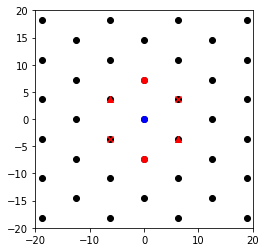

In [504]:
##reciprical lattice
Recip_lat=[]
for i in n1:
    for j in n2:
        point=b_1*i+b_2*j
        
        point_x=b_1[0]*i+b_2[0]*j
        point_y=b_1[1]*i+b_2[1]*j
        
        Recip_lat.append(point)
        scatter(point[0],point[1], c='k')
        #print(point[0],point[1])
        
point_x=b_1[0]*0+b_2[0]*0
point_y=b_1[1]*0+b_2[1]*0
scatter(point_x,point_y, c='b')
plt.xlim([-20,20])
plt.ylim([-20,20])

knns=[]

## 0 pm 1
point_x=b_1[0]*0+b_2[0]*1
point_y=b_1[1]*0+b_2[1]*1
scatter(point_x,point_y, c='r')
knns.append([point_x,point_y])

## 0 pm 1
point_x=b_1[0]*0+b_2[0]*(-1)
point_y=b_1[1]*0+b_2[1]*(-1)
scatter(point_x,point_y, c='r')
knns.append([point_x,point_y])

##  mp 1 pm 1
point_x=b_1[0]*(-1)+b_2[0]*(-1)
point_y=b_1[1]*(-1)+b_2[1]*(-1)
scatter(point_x,point_y, c='r',marker='x')
knns.append([point_x,point_y])

##  mp 1 pm 1
point_x=b_1[0]*(1)+b_2[0]*1
point_y=b_1[1]*(1)+b_2[1]*1
scatter(point_x,point_y, c='r',marker='x')
knns.append([point_x,point_y])

## pm 1 0
point_x=b_1[0]*(1)+b_2[0]*0
point_y=b_1[1]*(1)+b_2[1]*0
scatter(point_x,point_y, c='r',marker='^')
knns.append([point_x,point_y])

## pm 1 0
point_x=b_1[0]*(-1)+b_2[0]*0
point_y=b_1[1]*(-1)+b_2[1]*0
scatter(point_x,point_y, c='r',marker='^')
knns.append([point_x,point_y])
plt.gca().set_aspect('equal', adjustable='box')

# Dispersion Array

In [505]:
kx=np.linspace(-2*np.pi/a,2*np.pi/a,100)
ky=np.linspace(-2*np.pi/a,2*np.pi/a,100)

kxx,kyy=np.meshgrid(kx,ky)
e=np.zeros(np.shape(kxx))
for nn in nns:
    e=e-tp1*exp(1j*(nn[0]*kxx+nn[1]*kyy))
for nnn in nnns:
    e=e-tp2*exp(1j*(nnn[0]*kxx+nnn[1]*kyy))
    

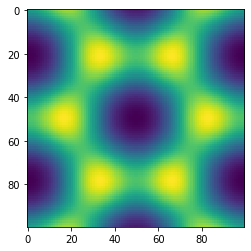

In [506]:
imshow(np.real(e))

# Dispersion as function

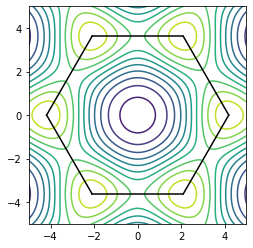

In [507]:
import numpy as np
import matplotlib.pyplot as plt

#defining tight bindind dispersion
def e2d(kx,ky, mu):

    e=0
    for nn in nns:
        e=e-tp1*exp(1j*(nn[0]*kx+nn[1]*ky))
    for nnn in nnns:
        e=e-tp2*exp(1j*(nnn[0]*kx+nnn[1]*ky))
    return np.real(e)-mu


#plotting contours
x = np.linspace(-10, 10, 300)
X, Y = np.meshgrid(x, x)
Z = e2d(X, Y, 0)
plt.contour(X, Y, Z,10);

#plotting reciprocal lattice
for i in knns:
    plt.scatter(i[0],i[1],c='k')

    
####
##making wigner-seitz cell using voronoi subroutine
points = np.array(knns)
ls=list(knns)
ls.append([0,0])
points = np.array(ls)

from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)

#organizing the voronoi vertices 
pol=(vor.vertices).T
lss=[]

Kprime_point_1=[pol[0,1],pol[1,1]]
K_point_1=[pol[0,2],pol[1,2]]
Kprime_point_2=[pol[0,3],pol[1,3]]
K_point_2=[pol[0,0],pol[1,0]]
Kprime_point_3=[pol[0,4],pol[1,4]]
K_point_3=[pol[0,5],pol[1,5]]

lss.append(Kprime_point_1)
lss.append(K_point_1)
lss.append(Kprime_point_2)
lss.append(K_point_2)
lss.append(Kprime_point_3)
lss.append(K_point_3)

#plotting boundary of wigner-seitz cell with linear interpolation
t=np.linspace(0,1,1000)
pol=np.array(lss).T
for i in range(6):
    plt.plot(pol[0,i%6]*(1-t)+t*pol[0,(i+1)%6],pol[1,i%6]*(1-t)+t*pol[1,(i+1)%6],c='k')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.gca().set_aspect('equal', adjustable='box')

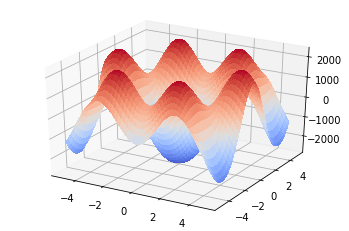

In [508]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, x)
Z = e2d(X, Y, 0)


fig = plt.figure()
ax = fig.gca(projection='3d')


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Obtaining k points

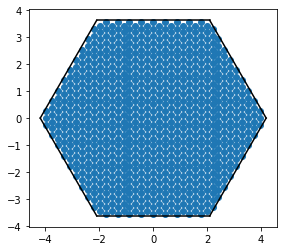

In [509]:

t=np.linspace(0,1,1000)
pol=np.array(lss).T
for i in range(6):
    plt.plot(pol[0,i%6]*(1-t)+t*pol[0,(i+1)%6],pol[1,i%6]*(1-t)+t*pol[1,(i+1)%6],c='k')

#generating k points
kx=np.linspace(-5*np.pi/a,5*np.pi/a,50)
ky=np.linspace(-5*np.pi/a,5*np.pi/a,50)

#kxx,kyy=np.meshgrid(kx,ky)
scale_fac=0.035
Recip_lat_arr=scale_fac*np.array(Recip_lat)
kxx=Recip_lat_arr[:,0]
kyy=Recip_lat_arr[:,1]

phi=2*np.pi/6 #rotation angle 

#rotating and cleaving if absolute value of rotated point's y coordinate exceeds top boundary of 1BZ
kxx_rot=np.cos(phi)*kxx-np.sin(phi)*kyy
kyy_rot=np.sin(phi)*kxx+np.cos(phi)*kyy

kxx2=kxx[np.where(np.abs(kyy_rot)<K_point_3[1])]
kyy2=kyy[np.where(np.abs(kyy_rot)<K_point_3[1])]

#rotating and cleaving if absolute value of rotated point's y coordinate exceeds top boundary of 1BZ
kxx_rot2=np.cos(-phi)*kxx2-np.sin(-phi)*kyy2
kyy_rot2=np.sin(-phi)*kxx2+np.cos(-phi)*kyy2

kxx3=kxx2[np.where(np.abs(kyy_rot2)<K_point_3[1])]
kyy3=kyy2[np.where(np.abs(kyy_rot2)<K_point_3[1])]

KX=kxx3[np.where(np.abs(kyy3)<K_point_3[1])]
KY=kyy3[np.where(np.abs(kyy3)<K_point_3[1])]

#np.where(np.abs(kyy)<K_point_3[1] and 
#scatter(kxx_rot,kyy_rot)
#scatter(kxx,kyy)
scatter(KX,KY)
plt.gca().set_aspect('equal', adjustable='box')

In [510]:
epsil=450
size_E=500

minE=np.min(e2d(KX, KY, 0))-epsil
maxE=np.max(e2d(KX, KY, 0))+epsil

def deltad(x,epsil):
    
    return (1/(np.pi*epsil))/(1+(x/epsil)**2)

print("extremal energy values...",minE,maxE,epsil/(maxE-minE))

earr=np.linspace(minE,maxE,size_E)
Dos=[]

for i in earr:
    dosi=np.sum(np.sum(deltad(e2d(KX, KY, 0)-i,epsil)))*Vol_rec*scale_fac*scale_fac
    Dos.append(dosi)

extremal energy values... -3210.0 2752.4260120454373 0.07547263464416985


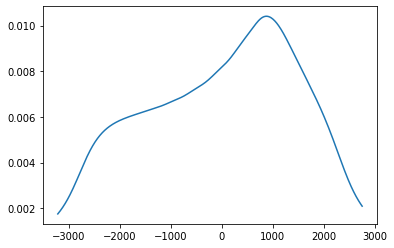

In [511]:
plt.plot(earr,Dos)
plt.show()

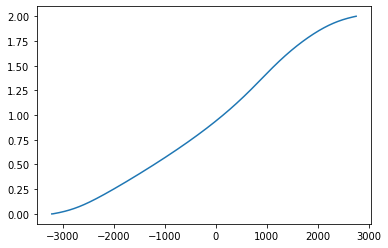

In [512]:
ndens=[]
for mu_ind in range(size_E):
    de=earr[1]-earr[0]
    N=np.trapz(Dos[0:mu_ind])*de
    ndens.append(N)
nn=np.array(ndens)
nn=2*nn/nn[-1]

plt.plot(earr, nn)
plt.show()

281


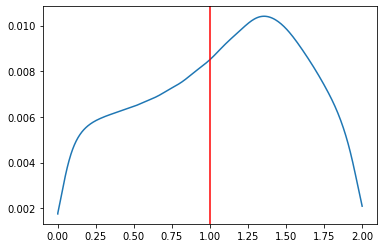

In [513]:
targ=1
indi=np.argmin(abs(nn-targ))
print(indi)
e0=earr[indi]


plt.plot(nn,Dos)
plt.axvline(nn[indi], c='r')
plt.show()


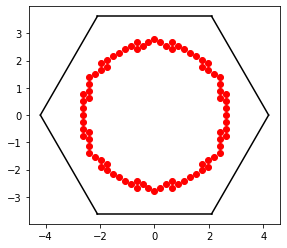

In [514]:
Ps=[]
Xs=[]
Ys=[]
eps=epsil/2
for i in range(np.size(KX)):
    if np.abs(e2d(KX[i],KY[i],0)-e0)<eps:
        Ps.append([KX[i],KY[i]])
        Xs.append(KX[i])
        Ys.append(KY[i])
xs=np.array(Xs)
ys=np.array(Ys)
for i in range(6):
    plt.plot(pol[0,i%6]*(1-t)+t*pol[0,(i+1)%6],pol[1,i%6]*(1-t)+t*pol[1,(i+1)%6],c='k')

plt.scatter(xs,ys, c='r')

#plt.xlim([-np.pi,np.pi])
#plt.ylim([-np.pi,np.pi])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

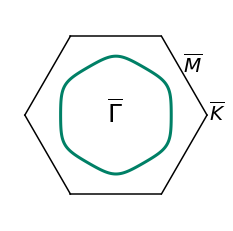

In [531]:
#plotting contours
x = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, x)
Z = e2d(X, Y, 0)
plt.contour(X, Y, Z,levels=[e0],linewidths=3, cmap='summer');
pol=np.array(lss).T
for i in range(6):
    plt.plot(pol[0,i%6]*(1-t)+t*pol[0,(i+1)%6],pol[1,i%6]*(1-t)+t*pol[1,(i+1)%6],c='k')

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-5,5])
plt.ylim([-5,5])
xticks([])
yticks([])
plt.text(3.1,2,r'$\overline{M}$',size=20)
plt.text(4.3,-0.20,r'$\overline{K}$',size=20)
plt.text(-0.42,-0.3,r'$\overline{\Gamma}$',size=25)
axis("off")
plt.savefig('FS_Pd_layer.png')